In [5]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [6]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Create Label Variable

In [7]:
# change to read local data
# labels = os.listdir(r"/content/drive/MyDrive/Eye_Classification/data")


In [8]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /mnt/c/Users/soowe/OneDrive/Documents/GitHub/DL_Driver-drowsiness-detection


In [9]:
labels = os.listdir('train/data')

In [10]:
labels
#Show label and create labels variable

['Closed', 'no_yawn', 'Open', 'yawn']

## Show a random image

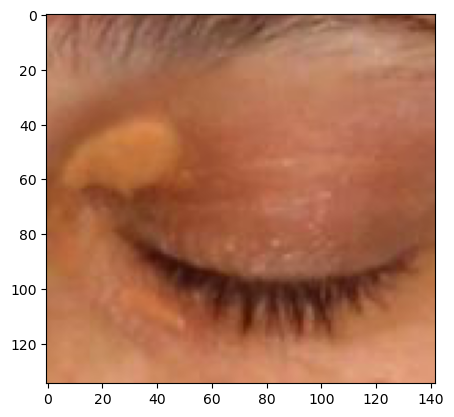

In [11]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("train/data/" + labels[0] + "/_1.jpg"))

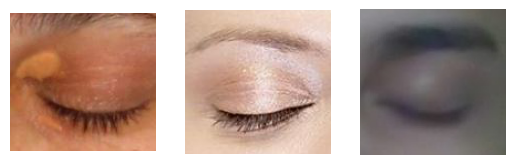

In [12]:


# Load and display multiple images
image_paths = ["train/data/" + labels[0] + "/_1.jpg", "train/data/" + labels[0] + "/_2.jpg","train/data/" + labels[0] + "/_3.jpg"]

num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images)

for i, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## Create a and show Image array

In [13]:
a = plt.imread("train/data/yawn/10.jpg")

## Image shape

In [14]:
a.shape

(480, 640, 3)

## Display the image of a yawning face without the background, using the array representation of the face image.


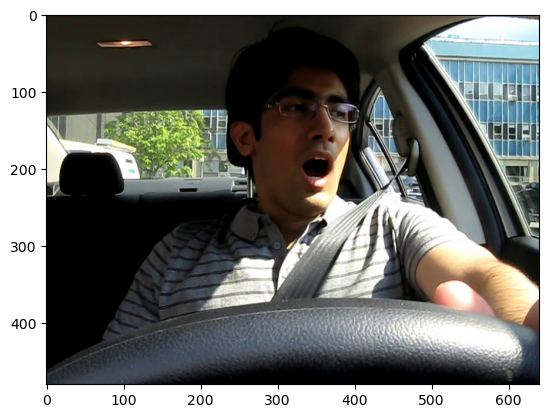

In [15]:
plt.imshow(plt.imread("train/data/yawn/61.jpg"))

## Extract only the face region from both yawn and not_yawn images.

In [16]:
def face_for_yawn(direc="train/data/", face_cas_path="model/haarcascade/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    face_cascade = cv2.CascadeClassifier(face_cas_path)

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            try:
                image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
                for (x, y, w, h) in faces:
                    roi_color = image_array[y:y+h, x:x+w]
                    resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                    yaw_no.append([resized_array, class_num1])
            except Exception as e:
                print(f"Error processing image {image}: {e}")

    return yaw_no

## For Closed and Open eye

In [17]:
def get_data(dir_path="train/data"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []

    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label) + 2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")

    return data

## Expand the dataset by adding more data and convert the data into an array format.

In [18]:
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)

    # Ensure all images and labels are correctly formatted
    images = []
    labels = []

    for item in yaw_no:
        images.append(item[0])
        labels.append(item[1])

    return np.array(images), np.array(labels)

## New variable to store

In [19]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

2025-04-27 16:22:56.729969: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 16:22:56.747989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745742176.762452   33047 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745742176.766895   33047 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745742176.781417   33047 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Tensor Flow Version: 2.19.0
Keras Version: 3.9.2

Python 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Pandas 2.2.3
Scikit-Learn 1.6.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


I0000 00:00:1745742179.120259   33047 gpu_device.cc:2019] Created device /device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [20]:
import tensorflow as tf

# Check if TensorFlow sees the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU is available!")
    for gpu in gpus:
        print(f"Device: {gpu}")
else:
    print("❌ GPU not available.")


✅ GPU is available!
Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [21]:
new_images, new_labels = append_data()
print("Data shape:", new_images.shape, new_labels.shape)

0
1
2
3
Data shape: (1925, 145, 145, 3) (1925,)


## Separate the labels and features in the dataset

## Reshape images X

In [22]:
X = np.array(new_images)
X = X.reshape(-1, 145, 145, 3)

In [23]:
X.shape

(1925, 145, 145, 3)

## Perform label binarization.

In [24]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(new_labels)

## Label array

In [25]:
y = np.array(y)

In [26]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Train Test split

In [27]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

## Length of X_test

In [28]:
len(X_test)

578

## Import some dependencies

In [30]:
from tensorflow.python.keras.layers import Lambda, Dropout
from tensorflow.python.keras.layers.advanced_activations import ELU, LeakyReLU, ReLU
from tensorflow.python.keras import activations
from keras import callbacks, layers, metrics, regularizers
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation,SimpleRNN
import cv2
import os
import numpy as np
import pandas as pd
import pickle


## Data Augmentation

In [31]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Build and train CNN model

In [32]:
model_CNN = keras.models.Sequential()

model_CNN.add(Conv2D(filters= 256, kernel_size=(3, 3), activation="relu", input_shape=(145,145,3)))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 128, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 64, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 32, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(keras.layers.Flatten())
model_CNN.add(BatchNormalization())
model_CNN.add(Dropout(0.5))

model_CNN.add(keras.layers.Dense(64, activation="relu"))
model_CNN.add(keras.layers.Dense(4, activation="softmax"))

model_CNN.build(input_shape=(None, 145, 145, 3))
model_CNN.summary()

model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



/home/wlsoo/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745742312.959189   33047 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 143, 143, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 143, 143, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 71, 71, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 69, 69, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1568)           │         6,272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,332 (1.92 MB)

 Trainable params: 499,236 (1.90 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [33]:
# Add Callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Eye_Classification/history_and_model/best_model_CNN.h5', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save]

In [34]:
history_CNN = model_CNN.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

/home/wlsoo/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1745742317.978735   33800 service.cc:152] XLA service 0x7f1cf8006d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745742317.978896   33800 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-04-27 16:25:18.090211: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745742318.609704   33800 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-27 16:25:22.219942: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
I0000 00:00:1745742327.366706   33800 device_compiler.h:188] Compiled cluster using XLA!  This line is logg

12/43 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.2789 - loss: 2.5362

2025-04-27 16:25:32.126556: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-27 16:25:33.032471: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.5085 - loss: 1.6649

2025-04-27 16:25:42.326383: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-27 16:25:43.804510: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


PermissionError: [Errno 13] Permission denied: '/content'

In [ ]:
model_CNN.save('/content/drive/MyDrive/Eye_Classification/history_and_model/last_model_CNN.h5')
with open('/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN.pkl', 'wb') as file_pi:
    pickle.dump(history_CNN.history, file_pi)

# Build and train CNN-RNN model

In [ ]:
import keras
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, SimpleRNN, Flatten, Dropout, Dense, Reshape

model_CNN_RNN = keras.models.Sequential()

# Initial Conv2D layer to extract initial spatial features
model_CNN_RNN.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu", input_shape=(145, 145, 3)))
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(MaxPooling2D(pool_size=(2, 2)))

# Another Conv2D layer before transitioning to RNN
model_CNN_RNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", kernel_initializer='he_normal'))
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(MaxPooling2D(pool_size=(2, 2)))

# Reshape the output to be suitable for RNN input
model_CNN_RNN.add(Reshape((34, 34 * 128)))

# Adding SimpleRNN layers
model_CNN_RNN.add(SimpleRNN(64, activation='relu', return_sequences=True))
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(SimpleRNN(32, activation='relu'))
model_CNN_RNN.add(BatchNormalization())

# Flatten and add Dense layers
model_CNN_RNN.add(Flatten())
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(Dropout(0.5))

model_CNN_RNN.add(Dense(64, activation="relu"))
model_CNN_RNN.add(Dense(4, activation="softmax"))

model_CNN_RNN.build(input_shape=(None, 145, 145, 3))
model_CNN_RNN.summary()

model_CNN_RNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Add Callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Eye_Classification/history_and_model/best_model_CNN_RNN.h5', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save]

In [ ]:
history_CNN_RNN = model_CNN_RNN.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

In [ ]:
model_CNN_RNN.save('/content/drive/MyDrive/Eye_Classification/history_and_model/last_model_CNN_RNN.h5')
with open('/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN_RNN.pkl', 'wb') as file_pi:
    pickle.dump(history_CNN_RNN.history, file_pi)

# Comparision

In [ ]:
from keras.models import load_model

best_model_CNN = load_model("/content/drive/MyDrive/Eye_Classification/history_and_model/best_model_CNN.h5")
best_model_CNN_RNN = load_model("/content/drive/MyDrive/Eye_Classification/history_and_model/best_model_CNN_RNN.h5")

history_path_CNN = "/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN.pkl"
history_path_CNN_RNN = "/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN_RNN.pkl"

with open(history_path_CNN, 'rb') as file:
    history_CNN = pickle.load(file)
with open(history_path_CNN_RNN, 'rb') as file:
    history_CNN_RNN = pickle.load(file)

## Comapare accuracy and loss on train and val set

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
accuracy_CNN = history_CNN['accuracy']
val_accuracy_CNN = history_CNN['val_accuracy']
loss_CNN = history_CNN['loss']
val_loss_CNN = history_CNN['val_loss']

accuracy_CNN_RNN = history_CNN_RNN['accuracy']
val_accuracy_CNN_RNN = history_CNN_RNN['val_accuracy']
loss_CNN_RNN = history_CNN_RNN['loss']
val_loss_CNN_RNN = history_CNN_RNN['val_loss']

# Debug prints to verify lengths and data
print("CNN Training Accuracy: ", accuracy_CNN)
print("CNN Validation Accuracy: ", val_accuracy_CNN)
print("CNN Training Loss: ", loss_CNN)
print("CNN Validation Loss: ", val_loss_CNN)

print("CNN-RNN Training Accuracy: ", accuracy_CNN_RNN)
print("CNN-RNN Validation Accuracy: ", val_accuracy_CNN_RNN)
print("CNN-RNN Training Loss: ", loss_CNN_RNN)
print("CNN-RNN Validation Loss: ", val_loss_CNN_RNN)

epochs_CNN = list(range(len(accuracy_CNN)))
epochs_CNN_RNN = list(range(len(accuracy_CNN_RNN)))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_CNN, accuracy_CNN, "b", label="CNN Training Accuracy")
plt.plot(epochs_CNN, val_accuracy_CNN, "r", label="CNN Validation Accuracy")
plt.plot(epochs_CNN_RNN, accuracy_CNN_RNN, "g", label="CNN-RNN Training Accuracy")
plt.plot(epochs_CNN_RNN, val_accuracy_CNN_RNN, "y", label="CNN-RNN Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_CNN, loss_CNN, "b", label="CNN Training Loss")
plt.plot(epochs_CNN, val_loss_CNN, "r", label="CNN Validation Loss")
plt.plot(epochs_CNN_RNN, loss_CNN_RNN, "g", label="CNN-RNN Training Loss")
plt.plot(epochs_CNN_RNN, val_loss_CNN_RNN, "y", label="CNN-RNN Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# classification report

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
# Make predictions
predictions_CNN = best_model_CNN.predict(X_test)
predictions_CNN_RNN = best_model_CNN_RNN.predict(X_test)

# Convert predictions to label indices
predicted_classes_CNN = np.argmax(predictions_CNN, axis=1)
predicted_classes_CNN_RNN = np.argmax(predictions_CNN_RNN, axis=1)

In [ ]:
from sklearn.metrics import classification_report
# Classification report for CNN
print("Classification Report for CNN:\n")
report_CNN = classification_report(np.argmax(y_test, axis=1), predicted_classes_CNN, target_names=labels_new)
print(report_CNN)

# Classification report for CNN-RNN
print("Classification Report for CNN-RNN:\n")
report_CNN_RNN = classification_report(np.argmax(y_test, axis=1), predicted_classes_CNN_RNN, target_names=labels_new)
print(report_CNN_RNN)

## Confusion matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_CNN = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_CNN)
cm_CNN_RNN = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_CNN_RNN)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels_new):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_new, yticklabels=labels_new)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Define class labels
labels_new = [ "Open","yawn", "no_yawn", "Closed",]

# Plot confusion matrices
plot_confusion_matrix(cm_CNN, "Confusion Matrix for CNN", labels_new)
plot_confusion_matrix(cm_CNN_RNN, "Confusion Matrix for CNN-RNN", labels_new)


# predicting function

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    try:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
        img_array = img_array / 255
        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    except Exception as e:
        print("Error occurred while reading the image file:", e)
        return None

model = tf.keras.models.load_model("./drowiness_new2.h5")

# Prediction
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [ ]:
prediction = model.predict([prepare(r"data\train\Closed\_100.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare(r"data\train\Closed\_120.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare(r"data\train\yawn\12.jpg")])
np.argmax(prediction)
